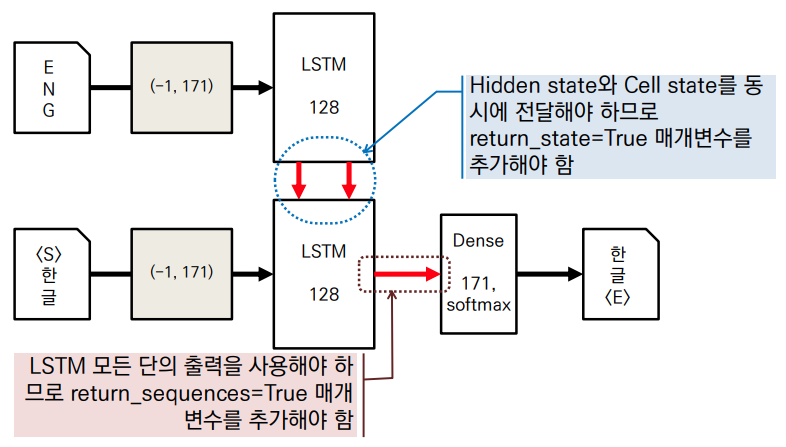

In [1]:
from tensorflow.keras import Sequential, Model, layers

enc_input = layers.Input(shape=(4, 171))
enc_out, state_h, state_c = layers.LSTM(128, return_sequences=True, return_state=True)(enc_input)

dec_input = layers.Input(shape=(3, 171)) # 한글 단어 2자와 start 토큰 1개
dec_out = layers.LSTM(128, return_sequences=True)(dec_input, initial_state=[state_h, state_c])

output = layers.Dense(171, activation='softmax')(dec_out)

model = Model(inputs=[enc_input, dec_input], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4, 171)]             0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 3, 171)]             0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 4, 128),             153600    ['input_1[0][0]']             
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                              

In [3]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam')

In [9]:
#데이터 불러오기, 영문자, 한글글자, 단어사전
import numpy as np
import pandas as pd

#acc1 = ['S', 'E', 'P', 'a', 'b', ...
arr1 = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz']
print(arr1)
arr2 = pd.read_csv('korean.csv', header=None)
#print(arr2[0].values.tolist())
num_to_char = arr1 + arr2[0].values.tolist()
print(len(num_to_char))

['S', 'E', 'P', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
171


In [10]:
char_to_num = {char : i for i, char in enumerate(num_to_char)}

In [11]:
char_to_num

{'S': 0,
 'E': 1,
 'P': 2,
 'a': 3,
 'b': 4,
 'c': 5,
 'd': 6,
 'e': 7,
 'f': 8,
 'g': 9,
 'h': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'p': 18,
 'q': 19,
 'r': 20,
 's': 21,
 't': 22,
 'u': 23,
 'v': 24,
 'w': 25,
 'x': 26,
 'y': 27,
 'z': 28,
 '가': 29,
 '각': 30,
 '간': 31,
 '감': 32,
 '개': 33,
 '거': 34,
 '것': 35,
 '게': 36,
 '계': 37,
 '고': 38,
 '관': 39,
 '광': 40,
 '구': 41,
 '굴': 42,
 '규': 43,
 '그': 44,
 '금': 45,
 '기': 46,
 '깊': 47,
 '나': 48,
 '날': 49,
 '남': 50,
 '내': 51,
 '넓': 52,
 '녀': 53,
 '노': 54,
 '놀': 55,
 '농': 56,
 '높': 57,
 '뉴': 58,
 '늦': 59,
 '다': 60,
 '단': 61,
 '도': 62,
 '동': 63,
 '들': 64,
 '람': 65,
 '랑': 66,
 '래': 67,
 '램': 68,
 '류': 69,
 '름': 70,
 '릎': 71,
 '리': 72,
 '많': 73,
 '망': 74,
 '매': 75,
 '머': 76,
 '먼': 77,
 '멍': 78,
 '메': 79,
 '명': 80,
 '모': 81,
 '목': 82,
 '무': 83,
 '물': 84,
 '미': 85,
 '바': 86,
 '반': 87,
 '방': 88,
 '번': 89,
 '복': 90,
 '부': 91,
 '분': 92,
 '붕': 93,
 '비': 94,
 '뿌': 95,
 '사': 96,
 '상': 97,
 '색': 98,
 '생': 99,
 '서': 100,

In [13]:
raw = pd.read_csv("translate.csv", header=None)
eng_kor = raw.values.tolist()
print(len(eng_kor))

110


In [14]:
temp_eng = 'love'
temp_eng_n = [char_to_num[c] for c in temp_eng ]
print(temp_eng_n)

[14, 17, 24, 7]


In [15]:
temp_kor = '사랑'
temp_kor_n = [char_to_num[c] for c in temp_kor]
print(temp_kor_n)

[96, 66]


In [16]:
np.eye(5)[[4,3,1]]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
np.eye(171)[[14,17,24,7]].shape

(4, 171)

In [34]:
def encode(words):
    enc_in = []
    dec_in = []
    rnn_out = []

    for word in words:
        eng = [char_to_num[c] for c in word[0]]
        enc_in.append(np.eye(171)[eng])  # eng 리스트로 인덱싱

        kor = [char_to_num[c] for c in 'S' + word[1]]
        dec_in.append(np.eye(171)[kor])

        target = [char_to_num[c] for c in word[1] + 'E']
        rnn_out.append(target)  # loss 함수에서 sparse_를 붙일 것이기 때문에

    enc_in = np.array(enc_in)
    dec_in = np.array(dec_in)
    rnn_out = np.expand_dims(np.array(rnn_out), axis=2)
    return enc_in, dec_in, rnn_out

sample = [['word', '단어']]
encode(sample)[2]

array([[[ 61],
        [114],
        [  1]]])

In [37]:
X_enc, X_dec, y_rnn=encode(eng_kor)

In [38]:
model.fit([X_enc, X_dec], y_rnn, epochs=500)

Epoch 1/500
4/4 [==============================] - 3s 11ms/step - loss: 5.1320
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 5.0919
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 5.0390
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 4.9502
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 4.7784
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 4.4064
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 3.7479
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 3.5400
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 3.5950
Epoch 10/500
4/4 [==============================] - 0s 6ms/step - loss: 3.4233
Epoch 11/500
4/4 [==============================] - 0s 6ms/step - loss: 3.3822
Epoch 12/500
4/4 [==============================] - 0s 6ms/step - loss: 3.3855
Epoch 13/500
4/4 [==============================] - 0s 6ms/s

In [50]:
input_data = [['love', 'PP']]
in_, out_, _ = encode(input_data)
pred = model.predict([in_, out_])
#print(pred)
word = np.argmax(pred[0], axis=1)
print(word)
print(num_to_char[word[0]], num_to_char[word[1]])

1/1 [==============================] - 0s 14ms/step
[96 66  1]
사 랑
